In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
amazon = pd.read_csv("AmazonFoodCategory Dataset.csv")

In [3]:
# 전처리
amazon = amazon[amazon['Discount Amount'] >=0]
amazon = amazon[amazon['Sales Price'] > 0]
amazon = amazon[amazon['Sales Quantity'] > 0]
amazon.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon = amazon[amazon['Sales Cost Amount'] > 0]
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

In [4]:
# 이상치 처리, 할인율이 0보다 작으면 덤탱이?
amazon[amazon['Discount Amount'] < 0]

# 이상치 처리, 판매금액이 0 보다 작으면 돈주고 물건을 팔았을까?
amazon[amazon['Sales Amount'] <= 0]

# 이상치 처리, 할인 적용된 판매금액이 과연 0보다 작을까?
amazon[amazon['Sales Amount Based on List Price'] <= 0]

# 이상치 처리: 판매 비용이 과연 0보다 작을까?
amazon[amazon['Sales Cost Amount'] <= 0]

# 마진이 0보다 작을 수 있을까? 가능은 할수도 있긴 할 것 같은데 통상적으로 저러진 않을것 같다. 
amazon[amazon['Sales Margin Amount'] <= 0]

# 이상치 처리: 원판매가가 할인도 적용안받았는데 음수?
amazon[amazon['Sales Price'] <= 0]

# 이상치 처리: 물건을 0개 팔았으면 굳이 데이터로 기록할 이유가 있을까?
amazon[amazon['Sales Quantity'] <= 0]

# 이상치 처리: 판매액이 과연 음수일까? 
amazon[amazon['Sales Price'] <= 0]

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M


In [5]:
# 피봇 컬럼을 합쳐보자 (key = DateKey + Custkey)
a1 = amazon['DateKey'].str.replace('/','')
a2 = amazon['Custkey']
a1 = a1.astype('str')
a2 = a2.astype('str')

amazon['key'] = a2 +'-'+ a1
amazon['key'].str.startswith('10016588').value_counts()

key
False    63522
True       701
Name: count, dtype: int64

In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

In [7]:
# 이상치를 처리해보자
# 사실상 Discount Amount의 이상치만 처리해도 거의 대부분의 이상치가 날아간다.
# 의외로 Sales Cost Amount의 이상치를 처리했을때 200개 정도 더 날아갔다.
amazon1 = amazon[amazon['Discount Amount'] >=0]
amazon1 = amazon1[amazon1['Sales Price'] > 0]
amazon1 = amazon1[amazon1['Sales Quantity'] > 0]
#amazon1.drop(['Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon1 = amazon1[amazon1['Sales Cost Amount'] > 0]

# 데이터가 2018년 4월부터 12월까지 누락이 되어있으니, 18년 3월까지만의 데이터를 활용
amazon1['DateKey'] = pd.to_datetime(amazon1['DateKey'])
amazon1['year'] = amazon1['DateKey'].dt.year
amazon1['month'] = amazon1['DateKey'].dt.month
amazon1['day'] = amazon1['DateKey'].dt.day

In [8]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           64223 non-null  int64         
 1   DateKey                           64223 non-null  datetime64[ns]
 2   Discount Amount                   64223 non-null  float64       
 3   Invoice Number                    64223 non-null  int64         
 4   Item                              64223 non-null  object        
 5   List Price                        64223 non-null  float64       
 6   Sales Amount                      64223 non-null  float64       
 7   Sales Amount Based on List Price  64223 non-null  float64       
 8   Sales Cost Amount                 64223 non-null  float64       
 9   Sales Margin Amount               64223 non-null  float64       
 10  Sales Price                       64223 non-null  f

In [9]:
# 2017년 자료만
amazon2 = amazon1[amazon1['year'] == 2017]
amazon2.info()

# 2018년 자료만
amazon3 = amazon1[amazon1['year'] == 2018] 
amazon3 = amazon3[amazon3['month'] <= 3]
amazon3.info()

# 2018년 3월까지의 자료 합치기
amazon4 = pd.concat([amazon2, amazon3])
amazon4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 34707 to 65279
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           30001 non-null  int64         
 1   DateKey                           30001 non-null  datetime64[ns]
 2   Discount Amount                   30001 non-null  float64       
 3   Invoice Number                    30001 non-null  int64         
 4   Item                              30001 non-null  object        
 5   List Price                        30001 non-null  float64       
 6   Sales Amount                      30001 non-null  float64       
 7   Sales Amount Based on List Price  30001 non-null  float64       
 8   Sales Cost Amount                 30001 non-null  float64       
 9   Sales Margin Amount               30001 non-null  float64       
 10  Sales Price                       30001 non-nul

In [10]:
# 2019년 자료만
amazon5 = amazon1[amazon1['year'] == 2019]
amazon5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27916 entries, 0 to 28020
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           27916 non-null  int64         
 1   DateKey                           27916 non-null  datetime64[ns]
 2   Discount Amount                   27916 non-null  float64       
 3   Invoice Number                    27916 non-null  int64         
 4   Item                              27916 non-null  object        
 5   List Price                        27916 non-null  float64       
 6   Sales Amount                      27916 non-null  float64       
 7   Sales Amount Based on List Price  27916 non-null  float64       
 8   Sales Cost Amount                 27916 non-null  float64       
 9   Sales Margin Amount               27916 non-null  float64       
 10  Sales Price                       27916 non-null  f

In [11]:
# 임무를 다 했으니 산화하라
amazon4.drop(['year', 'month', 'day'], axis = 1, inplace = True)
amazon4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 34707 to 34705
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

In [12]:
# 너도
amazon5.drop(['year', 'month', 'day'], axis = 1, inplace = True)
amazon5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27916 entries, 0 to 28020
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           27916 non-null  int64         
 1   DateKey                           27916 non-null  datetime64[ns]
 2   Discount Amount                   27916 non-null  float64       
 3   Invoice Number                    27916 non-null  int64         
 4   Item                              27916 non-null  object        
 5   List Price                        27916 non-null  float64       
 6   Sales Amount                      27916 non-null  float64       
 7   Sales Amount Based on List Price  27916 non-null  float64       
 8   Sales Cost Amount                 27916 non-null  float64       
 9   Sales Margin Amount               27916 non-null  float64       
 10  Sales Price                       27916 non-null  f

In [13]:
amazon5.describe(include = 'all')

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M,key
count,2.791600e+04,27916,27916.000000,27916.000000,27916,27916.000000,27916.000000,27916.000000,27916.000000,27916.000000,27916.000000,27916.000000,27916,27916
unique,NaN,NaN,NaN,NaN,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6867
top,NaN,NaN,NaN,NaN,Better Fancy Canned Sardines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EA,10019194-752019
freq,NaN,NaN,NaN,NaN,711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25245,144
mean,1.001708e+07,2019-07-15 14:23:27.193007616,1981.604249,316475.491725,NaN,522.442717,2731.828831,4713.433080,1643.728580,1088.100250,278.434065,44.302801,NaN,NaN
min,1.000045e+07,2019-01-12 00:00:00,0.520000,300700.000000,NaN,0.392900,200.010000,208.340000,12.970000,-3932.930000,0.337341,1.000000,NaN,NaN
25%,1.001223e+07,2019-04-14 00:00:00,261.510000,308754.250000,NaN,187.010000,303.390000,572.550000,171.080000,123.150000,98.240000,2.000000,NaN,NaN
50%,1.001919e+07,2019-07-09 00:00:00,472.265000,316153.500000,NaN,346.530000,550.300000,1026.300000,313.120000,236.670000,182.035000,3.000000,NaN,NaN
75%,1.002246e+07,2019-10-11 00:00:00,1063.487550,324558.000000,NaN,824.960000,1257.960000,2327.820000,690.400000,548.860000,446.990000,8.000000,NaN,NaN
max,1.002758e+07,2019-12-31 00:00:00,343532.660000,332842.000000,NaN,2760.700000,517632.000000,632610.160000,366576.000000,164339.200000,1373.980000,16000.000000,NaN,NaN


In [14]:
# 17,18 모델 RFM 시자악
amazon4.isnull().sum() # 굿

Custkey                             0
DateKey                             0
Discount Amount                     0
Invoice Number                      0
Item                                0
List Price                          0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
U/M                                 0
key                                 0
dtype: int64

In [15]:
amazon4[['Custkey']].drop_duplicates()

,Custkey
34707,10002142
34711,10018363
34733,10009643
34734,10010923
34737,10016784
...,...
33870,10008381
33955,10011198
34108,10013127
34367,10019469


In [16]:
# 누가 얼마씩 쓰셨어요? (17,18)
df1_train = amazon4.groupby('key')[['Sales Amount']].sum().reset_index()
df1_train.head()

,key,Sales Amount
0,10000453-162017,8422.15
1,10000455-1142017,1756.21
2,10000455-1212017,1183.02
3,10000455-2112017,846.00
4,10000455-3132017,2820.00


In [17]:
# 매출별 귀인 찾는 중
df1_train['Custkey'] = df1_train['key'].str.split('-').str[0]
df1_train.head()
df2_train = df1_train[['Sales Amount', 'Custkey']]
df2_train = df2_train.groupby('Custkey')[['Sales Amount']].sum().reset_index()
df2_train = df2_train.sort_values('Sales Amount', ascending = False)
df2_train

,Custkey,Sales Amount
343,10021485,10949474.37
432,10025024,7951267.71
443,10025052,5419724.38
440,10025039,3259962.46
489,10025919,3250786.04
...,...,...
491,10026009,224.55
272,10019812,221.04
427,10024924,216.33
169,10013039,216.20


In [18]:
# 사용횟수 별 귀인 찾는 중
df3_train = df1_train.groupby(['Custkey']).count()
df3_train.drop('Sales Amount', axis = 1, inplace = True)
df3_train = df3_train.rename(columns = {'key': 'count'})
df3_train['count'].sort_values(ascending = False).reset_index()

,Custkey,count
0,10025919,219
1,10020184,144
2,10002506,121
3,10013238,117
4,10017638,116
...,...,...
524,10013574,1
525,10013127,1
526,10023780,1
527,10013039,1


In [19]:
# 귀인들이여 집결하라.
pineapple = pd.merge(df2_train, df3_train, on = 'Custkey')
pineapple['rank_sales'] = pineapple['Sales Amount'].rank(method = 'max')
pineapple['rank_count'] = pineapple['count'].rank(method = 'max')
pineapple

,Custkey,Sales Amount,count,rank_sales,rank_count
0,10021485,10949474.37,66,529.0,510.0
1,10025024,7951267.71,37,528.0,464.0
2,10025052,5419724.38,13,527.0,330.0
3,10025039,3259962.46,26,526.0,423.0
4,10025919,3250786.04,219,525.0,529.0
...,...,...,...,...,...
524,10026009,224.55,1,5.0,70.0
525,10019812,221.04,1,4.0,70.0
526,10024924,216.33,1,3.0,70.0
527,10013039,216.20,1,2.0,70.0


In [20]:
cond = (pineapple['rank_sales'] > 450) & (pineapple['rank_count'] > 450)
pineapple[cond]

,Custkey,Sales Amount,count,rank_sales,rank_count
0,10021485,10949474.37,66,529.0,510.0
1,10025024,7951267.71,37,528.0,464.0
4,10025919,3250786.04,219,525.0,529.0
5,10020184,2629591.08,144,524.0,528.0
7,10017828,2179662.75,59,522.0,503.0
9,10012715,1823351.63,108,520.0,524.0
10,10023715,1468530.66,61,519.0,505.0
12,10016588,1180754.47,85,517.0,519.0
14,10021160,1090389.31,39,515.0,474.0
15,10007134,918067.02,80,514.0,517.0


In [21]:
max(amazon4['DateKey'])

Timestamp('2018-03-21 00:00:00')

In [22]:
# RFM 시작 
# Recency = 가장 최근 거래일 + 1일
amazon4['period'] = (dt.datetime(2018,3,22) - amazon4['DateKey']).apply(lambda x: x.days + 1)
amazon4.head(3)

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M,key,period
34707,10002142,2017-12-31,347.76,219348,Golden Frozen Mushroom Pizza,85.77,424.17,771.93,186.75,237.42,47.130000,9,EA,10002142-12312017,82
34708,10002142,2017-12-31,387.61,219348,BBB Best Apple Jelly,86.04,472.79,860.40,310.17,162.62,47.279000,10,EA,10002142-12312017,82
34709,10002142,2017-12-31,463.16,219348,BBB Best Apple Jelly,171.35,564.94,1028.10,296.50,268.44,94.156667,6,EA,10002142-12312017,82


In [23]:
amazon4['period'] = (dt.datetime(2018,3,22) - amazon4['DateKey']).apply(lambda x: x.days + 1)
amazon4.head(3)

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M,key,period
34707,10002142,2017-12-31,347.76,219348,Golden Frozen Mushroom Pizza,85.77,424.17,771.93,186.75,237.42,47.130000,9,EA,10002142-12312017,82
34708,10002142,2017-12-31,387.61,219348,BBB Best Apple Jelly,86.04,472.79,860.40,310.17,162.62,47.279000,10,EA,10002142-12312017,82
34709,10002142,2017-12-31,463.16,219348,BBB Best Apple Jelly,171.35,564.94,1028.10,296.50,268.44,94.156667,6,EA,10002142-12312017,82


In [24]:
rfm_train = amazon4.groupby('Custkey').agg({
    'period': 'min', 'Invoice Number': 'count', 'Sales Amount': 'sum'})
rfm_train.columns = ['Recency', 'Frequency', 'Monetary']
rfm_train = rfm_train.reset_index()
rfm_train['Recency'] = 1 / rfm_train['Recency']
rfm_train

,Custkey,Recency,Frequency,Monetary
0,10000453,0.002268,10,8422.15
1,10000455,0.007194,19,22403.73
2,10000456,0.009174,23,104994.68
3,10000457,0.008929,3,14284.80
4,10000458,0.058824,4,4994.49
...,...,...,...,...
524,10027381,0.111111,108,70994.97
525,10027560,0.011494,42,48482.74
526,10027572,0.333333,45,46290.99
527,10027575,0.058824,5,3548.62


Text(0.5, 1.0, 'Monetary')

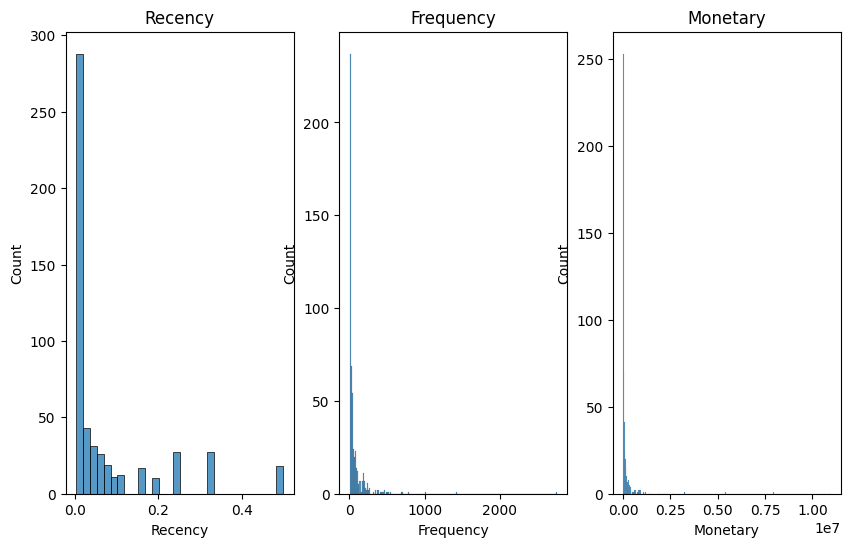

In [25]:
plt.figure(figsize = (10,6))
plt.subplot(1,3,1)
sns.histplot(rfm_train['Recency'])
plt.title('Recency')

plt.subplot(1,3,2)
sns.histplot(rfm_train['Frequency'])
plt.title('Frequency')

plt.subplot(1,3,3)
sns.histplot(rfm_train['Monetary'])
plt.title('Monetary')

In [26]:
# IQR 적용해보려고 했는데 그냥 개같이 멸망 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
# IQR 적용하면 오른쪽 끝만 없어지고 밑은 해결이 안됨
# ESD는 왼쪽끝 오른쪽끝 둘다 해결 안됨
q3_recency = rfm_train['Recency'].quantile(0.75)
q1_recency = rfm_train['Recency'].quantile(0.25)
iqr_recency = q3_recency - q1_recency
iqr_upper_limit_recency = q3_recency + 1.5*iqr_recency
iqr_lower_limit_recency = q1_recency - 1.5*iqr_recency
cond_recency = (rfm_train['Recency'] <= iqr_upper_limit_recency) & (rfm_train['Recency'] >= iqr_lower_limit_recency)
abc = rfm_train[cond_recency]
print(iqr_lower_limit_recency, iqr_upper_limit_recency)

-0.09306318681318683 0.1789148351648352


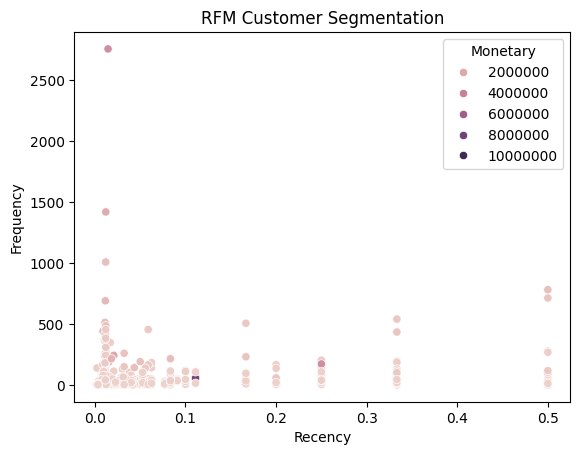

In [27]:
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'Monetary', data = rfm_train)
plt.title('RFM Customer Segmentation')
plt.show()

In [28]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
sd_sc = StandardScaler()
mm_sc = MinMaxScaler()
rb_sc = RobustScaler()
pt_sc = PowerTransformer(method = 'box-cox')

In [29]:
rfm_train_1 = rfm_train.copy()
rfm_train_1.drop('Custkey', axis = 1, inplace = True)

In [30]:
rfm_train_1

,Recency,Frequency,Monetary
0,0.002268,10,8422.15
1,0.007194,19,22403.73
2,0.009174,23,104994.68
3,0.008929,3,14284.80
4,0.058824,4,4994.49
...,...,...,...
524,0.111111,108,70994.97
525,0.011494,42,48482.74
526,0.333333,45,46290.99
527,0.058824,5,3548.62


In [31]:
# 재미있는 스케일링 시간
rfm_train_sd = pd.DataFrame(sd_sc.fit_transform(rfm_train_1), columns = rfm_train_1.columns)
rfm_train_mm = pd.DataFrame(mm_sc.fit_transform(rfm_train_1), columns = rfm_train_1.columns)
rfm_train_rb = pd.DataFrame(rb_sc.fit_transform(rfm_train_1), columns = rfm_train_1.columns)
rfm_train_pt = pd.DataFrame(pt_sc.fit_transform(rfm_train_1), columns = rfm_train_1.columns)

In [32]:
rfm_train_pt

,Recency,Frequency,Monetary
0,-1.704638,-0.393710,-0.527730
1,-0.754042,-0.006335,-0.076219
2,-0.570947,0.108741,0.660185
3,-0.591116,-1.123561,-0.285319
4,0.657144,-0.948784,-0.764261
...,...,...,...
524,1.015461,1.036444,0.470862
525,-0.406126,0.470756,0.288154
526,1.570450,0.512166,0.266115
527,0.657144,-0.813383,-0.917260


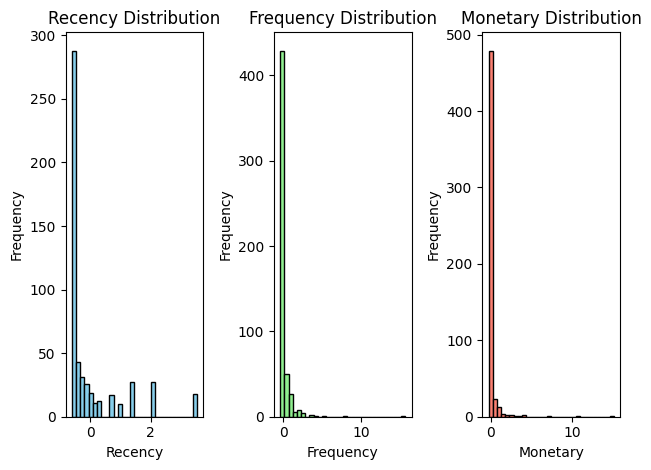

In [33]:
# StandardScaler
plt.subplot(1,3,1)
plt.hist(rfm_train_sd['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(rfm_train_sd['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(rfm_train_sd['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

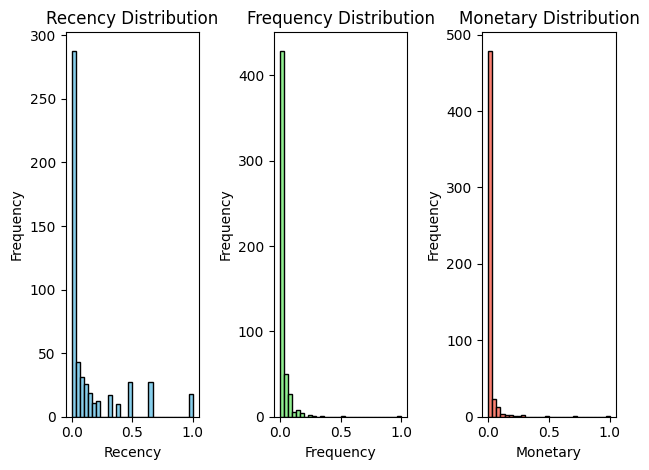

In [34]:
# MinMaxScaler
plt.subplot(1,3,1)
plt.hist(rfm_train_mm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(rfm_train_mm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(rfm_train_mm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

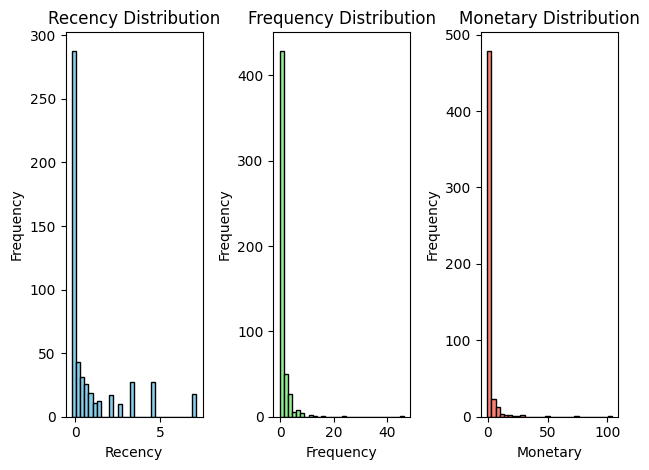

In [35]:
# RobustScaler
plt.subplot(1,3,1)
plt.hist(rfm_train_rb['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(rfm_train_rb['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(rfm_train_rb['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

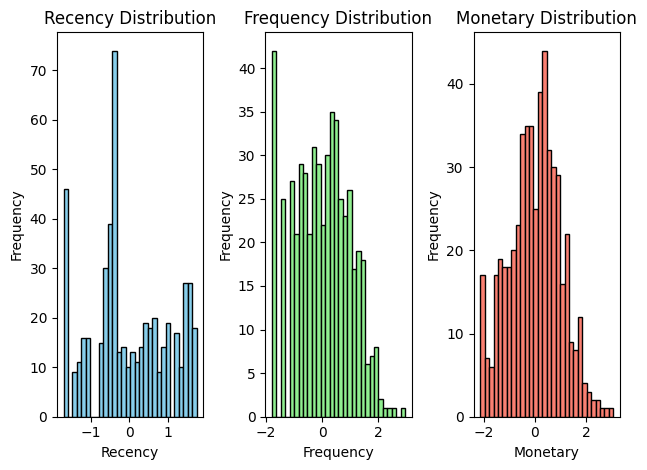

In [36]:
# Powertransformer - Box-Cox
plt.subplot(1,3,1)
plt.hist(rfm_train_pt['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(rfm_train_pt['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(rfm_train_pt['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [37]:
# K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

rfm_train_pt_mm = pd.DataFrame(mm_sc.fit_transform(rfm_train_pt), columns = rfm_train_pt.columns)

X = rfm_train_pt_mm[['Recency', 'Frequency', 'Monetary']]
kmeans = KMeans(n_clusters = 3, random_state = 42)
labels = kmeans.fit_predict(X)
rfm_train_1['label'] = labels

silhouette_score(X, labels)

np.float64(0.37786597807643735)

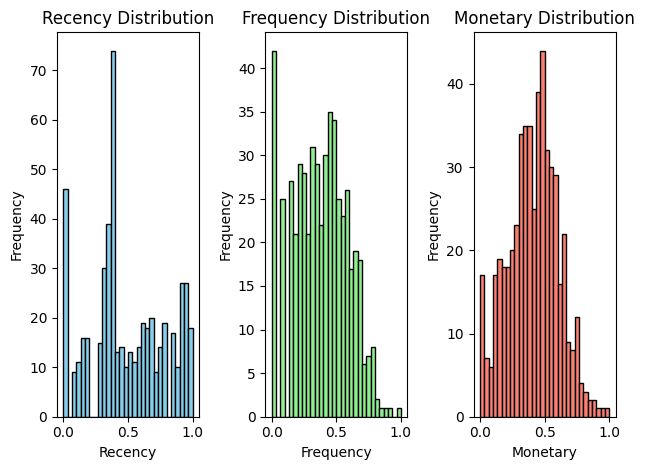

In [38]:
# Powertransformer - Box-Cox + MinMax
plt.subplot(1,3,1)
plt.hist(rfm_train_pt_mm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(rfm_train_pt_mm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(rfm_train_pt_mm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

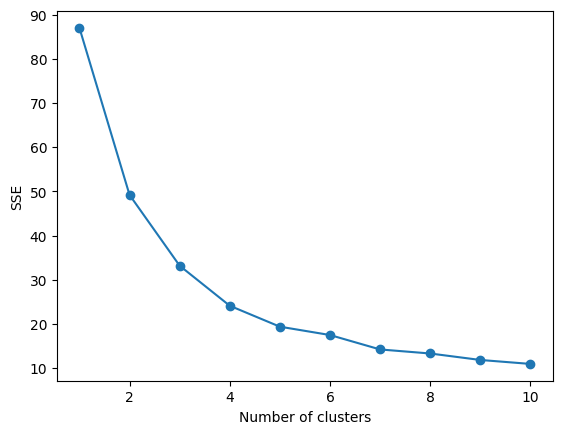

In [39]:
# elbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 엘보우 방법을 사용하여 최적의 K값 탐색
X = rfm_train_pt_mm[['Recency', 'Frequency', 'Monetary']]
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

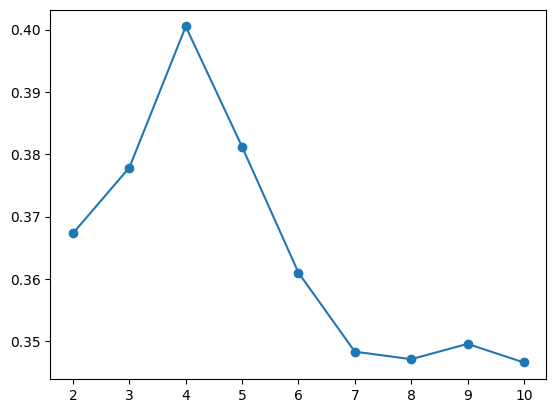

In [40]:
# Silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 실루엣 분석을 사용하여 최적의 K값 탐색
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 분석 그래프 그리기
plt.plot(range(2, 11), silhouette_scores, marker='o')

In [41]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

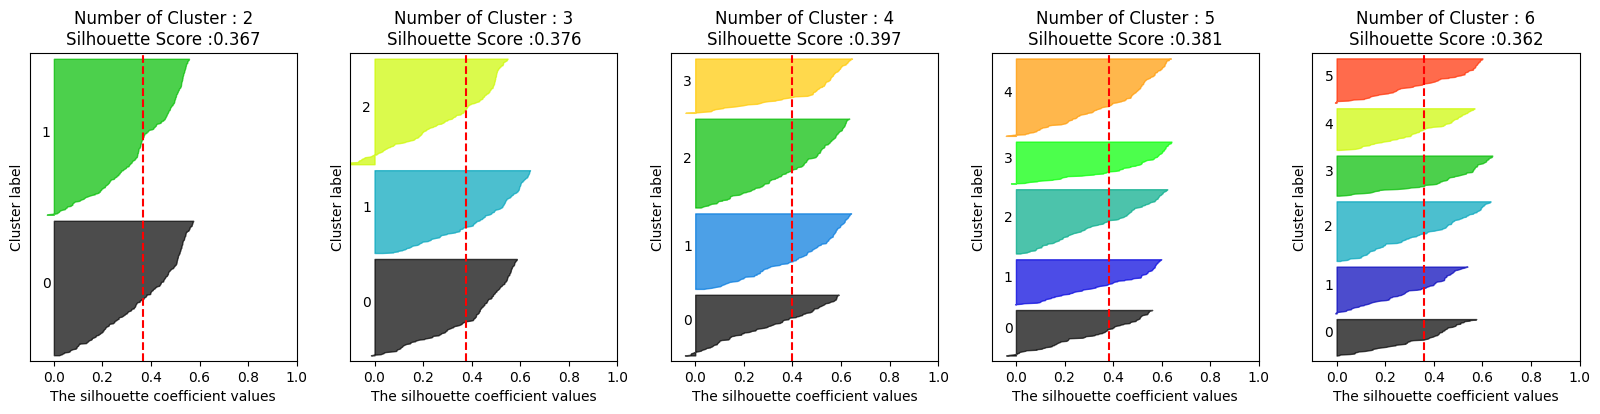

In [42]:
visualize_silhouette([2,3,4,5,6], X)

In [43]:
#!pip install yellowbrick

In [44]:
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [45]:
# kmeans = KMeans(random_state=42)
# elbow = KElbowVisualizer(kmeans, k=(1,11))
# elbow.fit(rfm_train_pt_mm)
# elbow.show()

In [46]:
kmeans_4 = KMeans(4, random_state = 42)
kmeans_4.fit(rfm_train_pt_mm)
cluster = kmeans_4.labels_

rfm_train_pt_mm['cluster'] = cluster
rfm_kmeans = rfm_train_pt_mm.copy()
rfm_kmeans

,Recency,Frequency,Monetary,cluster
0,0.001731,0.294586,0.309435,2
1,0.275898,0.376125,0.396328,1
2,0.328705,0.400348,0.538049,1
3,0.322888,0.140959,0.356087,2
4,0.682906,0.177748,0.263914,3
...,...,...,...,...
524,0.786250,0.595621,0.501614,0
525,0.376242,0.476548,0.466452,1
526,0.946318,0.485265,0.462210,0
527,0.682906,0.206249,0.234469,3


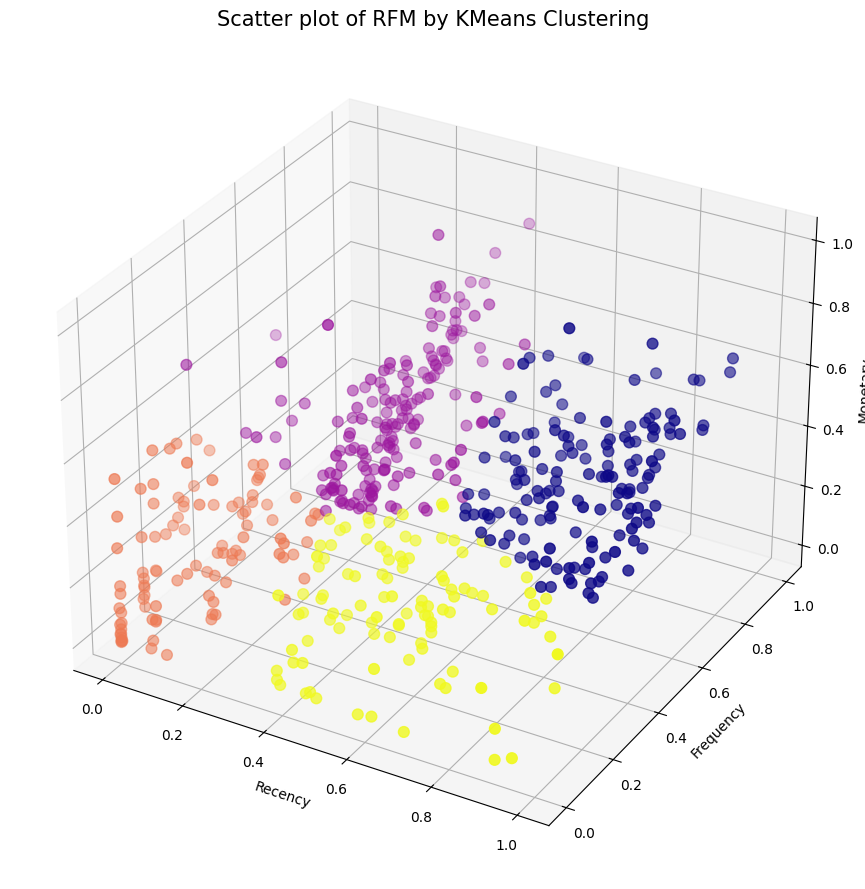

In [47]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm_kmeans['Recency'], rfm_kmeans['Frequency'], rfm_kmeans['Monetary'], c=rfm_kmeans['cluster'], s=60, depthshade= True, cmap='plasma')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Scatter plot of RFM by KMeans Clustering', fontsize = 15)
plt.tight_layout()
plt.show()

In [48]:
rfm_train['Recency_pt_mm'] = rfm_train_pt_mm['Recency']
rfm_train['Frequency_pt_mm'] = rfm_train_pt_mm['Frequency']
rfm_train['Monetary_pt_mm'] = rfm_train_pt_mm['Monetary']
rfm_train['Cluster'] = cluster
rfm_train

,Custkey,Recency,Frequency,Monetary,Recency_pt_mm,Frequency_pt_mm,Monetary_pt_mm,Cluster
0,10000453,0.002268,10,8422.15,0.001731,0.294586,0.309435,2
1,10000455,0.007194,19,22403.73,0.275898,0.376125,0.396328,1
2,10000456,0.009174,23,104994.68,0.328705,0.400348,0.538049,1
3,10000457,0.008929,3,14284.80,0.322888,0.140959,0.356087,2
4,10000458,0.058824,4,4994.49,0.682906,0.177748,0.263914,3
...,...,...,...,...,...,...,...,...
524,10027381,0.111111,108,70994.97,0.786250,0.595621,0.501614,0
525,10027560,0.011494,42,48482.74,0.376242,0.476548,0.466452,1
526,10027572,0.333333,45,46290.99,0.946318,0.485265,0.462210,0
527,10027575,0.058824,5,3548.62,0.682906,0.206249,0.234469,3


In [49]:
rfm_train.sort_values('Monetary',ascending = False)

,Custkey,Recency,Frequency,Monetary,Recency_pt_mm,Frequency_pt_mm,Monetary_pt_mm,Cluster
343,10021485,0.011236,244,10949474.37,0.371511,0.697944,1.000000,1
432,10025024,0.111111,57,7951267.71,0.786250,0.515108,0.966394,0
443,10025052,0.008929,13,5419724.38,0.322888,0.327946,0.926499,1
440,10025039,0.250000,173,3259962.46,0.906526,0.654821,0.874192,0
489,10025919,0.014493,2757,3250786.04,0.423729,1.000000,0.873904,1
...,...,...,...,...,...,...,...,...
491,10026009,0.003597,1,224.55,0.116123,0.000000,0.005923,2
272,10019812,0.002288,1,221.04,0.004055,0.000000,0.004665,2
427,10024924,0.002268,1,216.33,0.001731,0.000000,0.002945,2
169,10013039,0.062500,1,216.20,0.693119,0.000000,0.002897,3


In [50]:
set(rfm_train.sort_values('Monetary', ascending = False)[:106]['Cluster'])

{0, 1}

In [51]:
rfm_train.sort_values('Monetary', ascending = False)[55:111][rfm_train['Cluster'] == 2]

,Custkey,Recency,Frequency,Monetary,Recency_pt_mm,Frequency_pt_mm,Monetary_pt_mm,Cluster
195,10014540,0.003704,2,150000.0,0.12314,0.089022,0.571586,2


In [52]:
set(rfm_train.sort_values('Monetary', ascending = False)[112:166]['Cluster'])

{0, 1, 2}

In [53]:
set(rfm_train.sort_values('Monetary', ascending = False)[505:]['Cluster'])

{2, 3}

In [54]:
sum(rfm_train['Monetary'])

96803974.11

In [55]:
sum(rfm_train.sort_values('Monetary', ascending = False)['Monetary'][:106]) / sum(rfm_train['Monetary'])

0.8585266588906987

In [56]:
# 지호님 버전 고객 등급분류
cluster_mean = round(rfm_kmeans.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean(),2)
cluster_std = round(rfm_kmeans.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].std(),2)

In [57]:
print(cluster_mean, cluster_std)

         Recency  Frequency  Monetary
cluster                              
0           0.83       0.50      0.52
1           0.37       0.52      0.53
2           0.10       0.15      0.23
3           0.58       0.18      0.23          Recency  Frequency  Monetary
cluster                              
0           0.12       0.12      0.12
1           0.09       0.14      0.14
2           0.10       0.11      0.14
3           0.16       0.11      0.11


In [58]:
# 변동계수를 활용한 최적가중치 구하기
#Recency
cv_r0 = cluster_std.iloc[0,0]/cluster_mean.iloc[0,0]
cv_r1 = cluster_std.iloc[1,0]/cluster_mean.iloc[1,0]
cv_r2 = cluster_std.iloc[2,0]/cluster_mean.iloc[2,0]
cv_r3 = cluster_std.iloc[3,0]/cluster_mean.iloc[3,0]
#Recency의 가중평균 계산
w1 = min(cv_r0, cv_r1, cv_r2, cv_r3)/(cv_r0+cv_r1+cv_r2+cv_r3)

#Frequency
cv_f0 = cluster_std.iloc[0,1]/cluster_mean.iloc[0,1]
cv_f1 = cluster_std.iloc[1,1]/cluster_mean.iloc[1,1]
cv_f2 = cluster_std.iloc[2,1]/cluster_mean.iloc[2,1]
cv_f3 = cluster_std.iloc[3,1]/cluster_mean.iloc[3,1]
#Frequency의 가중평균 계산
w2 = min(cv_f0, cv_f1, cv_f2, cv_f3)/(cv_f0+cv_f1+cv_f2+cv_f3)

#Monetary
cv_m0 = cluster_std.iloc[0,2]/cluster_mean.iloc[0,2]
cv_m1 = cluster_std.iloc[1,2]/cluster_mean.iloc[1,2]
cv_m2 = cluster_std.iloc[2,2]/cluster_mean.iloc[2,2]
cv_m3 = cluster_std.iloc[3,2]/cluster_mean.iloc[3,2]
#Monetary의 가중평균 계산
w3 = min(cv_m0, cv_m1, cv_m2, cv_m3)/(cv_m0+cv_m1+cv_m2+cv_m3)

total_w = w1+w2+w3
w1 = round(w1/total_w, 3)
w2 = round(w2/total_w, 3)
w3 = round(w3/total_w, 3)

print(w1+w2+w3)
print(w1,w2,w3)

1.0
0.24 0.357 0.403


In [59]:
#!pip install lightgbm

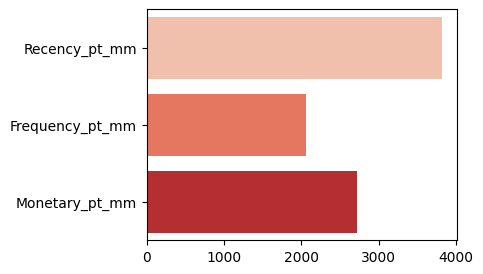

Recency_pt_mm: 0.44
Frequency_pt_mm: 0.24
Monetary_pt_mm: 0.32


In [60]:
from lightgbm import LGBMClassifier
X = rfm_train[['Recency_pt_mm', 'Frequency_pt_mm', 'Monetary_pt_mm']]
y = rfm_kmeans['cluster']

lgbm = LGBMClassifier(random_state=42, verbose=-1)
lgbm.fit(X,y)

plt.figure(figsize=(4,3))
sns.barplot(x=lgbm.feature_importances_, y=X.columns, palette='Reds')
plt.ylabel('')
plt.show()

#가중치 계산
scores = lgbm.feature_importances_/sum(lgbm.feature_importances_)
for i,c in enumerate(X.columns):
    print(f'{c}: {round(scores[i],2)}')

In [61]:
rfm_kmeans['rfm_score'] = round((0.44*rfm_kmeans['Recency'] + 0.24*rfm_kmeans['Frequency'] + 0.32*rfm_kmeans['Monetary']),4)*100
rfm_kmeans['rfm_score_1'] = round((0.3*rfm_kmeans['Recency'] + 0.5*rfm_kmeans['Frequency'] + 0.2*rfm_kmeans['Monetary']),4)*100

In [62]:
rfm_kmeans

,Recency,Frequency,Monetary,cluster,rfm_score,rfm_score_1
0,0.001731,0.294586,0.309435,2,17.05,20.97
1,0.275898,0.376125,0.396328,1,33.85,35.01
2,0.328705,0.400348,0.538049,1,41.29,40.64
3,0.322888,0.140959,0.356087,2,28.98,23.86
4,0.682906,0.177748,0.263914,3,42.76,34.65
...,...,...,...,...,...,...
524,0.786250,0.595621,0.501614,0,64.94,63.40
525,0.376242,0.476548,0.466452,1,42.92,44.44
526,0.946318,0.485265,0.462210,0,68.08,61.90
527,0.682906,0.206249,0.234469,3,42.50,35.49


In [63]:
# rfm_score_1은 혹시나 해서 넣어본 R = 0.3, F = 0.5, M = 0.2
# 역시나 rfm_score나 rfm_score_1이나 별차이 없다.
rfm_train['rfm_score'] = round((0.44*rfm_kmeans['Recency'] + 0.24*rfm_kmeans['Frequency'] + 0.32*rfm_kmeans['Monetary']),4)*100
rfm_train['rfm_score_1'] = round((0.3*rfm_kmeans['Recency'] + 0.5*rfm_kmeans['Frequency'] + 0.2*rfm_kmeans['Monetary']),4)*100

In [64]:
rfm_train.sort_values('Monetary', ascending = False)

,Custkey,Recency,Frequency,Monetary,Recency_pt_mm,Frequency_pt_mm,Monetary_pt_mm,Cluster,rfm_score,rfm_score_1
343,10021485,0.011236,244,10949474.37,0.371511,0.697944,1.000000,1,65.10,66.04
432,10025024,0.111111,57,7951267.71,0.786250,0.515108,0.966394,0,77.88,68.67
443,10025052,0.008929,13,5419724.38,0.322888,0.327946,0.926499,1,51.73,44.61
440,10025039,0.250000,173,3259962.46,0.906526,0.654821,0.874192,0,83.58,77.42
489,10025919,0.014493,2757,3250786.04,0.423729,1.000000,0.873904,1,70.61,80.19
...,...,...,...,...,...,...,...,...,...,...
491,10026009,0.003597,1,224.55,0.116123,0.000000,0.005923,2,5.30,3.60
272,10019812,0.002288,1,221.04,0.004055,0.000000,0.004665,2,0.33,0.21
427,10024924,0.002268,1,216.33,0.001731,0.000000,0.002945,2,0.17,0.11
169,10013039,0.062500,1,216.20,0.693119,0.000000,0.002897,3,30.59,20.85


<Axes: xlabel='Cluster', ylabel='rfm_score_1'>

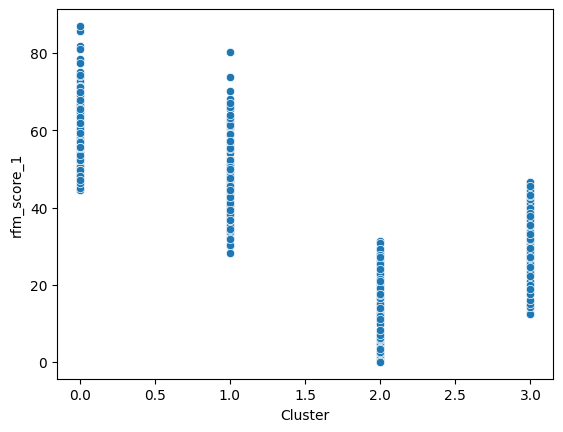

In [65]:
sns.scatterplot(x = 'Cluster', y = 'rfm_score_1', data = rfm_train)

<Axes: xlabel='Cluster', ylabel='rfm_score'>

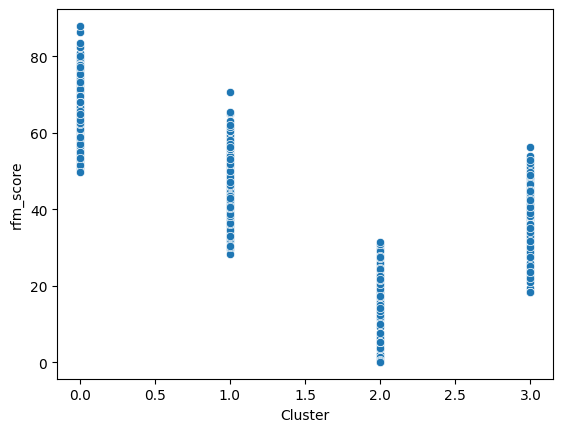

In [66]:
sns.scatterplot(x = 'Cluster', y = 'rfm_score', data = rfm_train)

In [67]:
def customer_segmentation(row):
    if row['rfm_score'] <=40:
        return 'family'
    elif row['rfm_score'] <=60:
        return 'silver'
    elif row['rfm_score'] <=70:
        return 'gold'
    elif row['rfm_score'] <=80:
        return 'platinum'
    else:
        return 'diamond'
    
rfm_kmeans['Grade'] = rfm_kmeans.apply(customer_segmentation, axis=1)
rfm_kmeans

rfm_train['Grade'] = rfm_train.apply(customer_segmentation, axis=1)
rfm_train

,Custkey,Recency,Frequency,Monetary,Recency_pt_mm,Frequency_pt_mm,Monetary_pt_mm,Cluster,rfm_score,rfm_score_1,Grade
0,10000453,0.002268,10,8422.15,0.001731,0.294586,0.309435,2,17.05,20.97,family
1,10000455,0.007194,19,22403.73,0.275898,0.376125,0.396328,1,33.85,35.01,family
2,10000456,0.009174,23,104994.68,0.328705,0.400348,0.538049,1,41.29,40.64,silver
3,10000457,0.008929,3,14284.80,0.322888,0.140959,0.356087,2,28.98,23.86,family
4,10000458,0.058824,4,4994.49,0.682906,0.177748,0.263914,3,42.76,34.65,silver
...,...,...,...,...,...,...,...,...,...,...,...
524,10027381,0.111111,108,70994.97,0.786250,0.595621,0.501614,0,64.94,63.40,gold
525,10027560,0.011494,42,48482.74,0.376242,0.476548,0.466452,1,42.92,44.44,silver
526,10027572,0.333333,45,46290.99,0.946318,0.485265,0.462210,0,68.08,61.90,gold
527,10027575,0.058824,5,3548.62,0.682906,0.206249,0.234469,3,42.50,35.49,silver


In [68]:
rfm_train.sort_values('Monetary', ascending = False)

,Custkey,Recency,Frequency,Monetary,Recency_pt_mm,Frequency_pt_mm,Monetary_pt_mm,Cluster,rfm_score,rfm_score_1,Grade
343,10021485,0.011236,244,10949474.37,0.371511,0.697944,1.000000,1,65.10,66.04,gold
432,10025024,0.111111,57,7951267.71,0.786250,0.515108,0.966394,0,77.88,68.67,platinum
443,10025052,0.008929,13,5419724.38,0.322888,0.327946,0.926499,1,51.73,44.61,silver
440,10025039,0.250000,173,3259962.46,0.906526,0.654821,0.874192,0,83.58,77.42,diamond
489,10025919,0.014493,2757,3250786.04,0.423729,1.000000,0.873904,1,70.61,80.19,platinum
...,...,...,...,...,...,...,...,...,...,...,...
491,10026009,0.003597,1,224.55,0.116123,0.000000,0.005923,2,5.30,3.60,family
272,10019812,0.002288,1,221.04,0.004055,0.000000,0.004665,2,0.33,0.21,family
427,10024924,0.002268,1,216.33,0.001731,0.000000,0.002945,2,0.17,0.11,family
169,10013039,0.062500,1,216.20,0.693119,0.000000,0.002897,3,30.59,20.85,family


In [69]:
condition = (rfm_train['Cluster'] == 0) & (rfm_train['Grade'] == 'platinum')
len(rfm_train[condition])

38

In [70]:
condition1 = (rfm_train['Cluster'] == 0) & (rfm_train['Grade'] == 'gold')
len(rfm_train[condition1])

55

In [71]:
condition2 = (rfm_train['Cluster'] == 0) & (rfm_train['Grade'] == 'silver')
len(rfm_train[condition2])

51

In [72]:
condition3 = (rfm_train['Cluster'] == 0) & (rfm_train['Grade'] == 'family')
len(rfm_train[condition3])

0

In [73]:
# 뭔가 결과가 아쉬운 것 같다.
# 윗 등급의 매출 기어율이 생각보다 너무 낮다.

In [74]:
sum(rfm_train['Monetary'][rfm_train['Grade'] == 'diamond']) / sum(rfm_train['Monetary'])

0.07114067550754194

In [75]:
sum(rfm_train['Monetary'][rfm_train['Grade'] == 'platinum']) / sum(rfm_train['Monetary'])

0.21063635411114426

In [76]:
sum(rfm_train['Monetary'][rfm_train['Grade'] == 'gold']) / sum(rfm_train['Monetary'])

0.341852525727882

In [77]:
sum(rfm_train['Monetary'][rfm_train['Grade'] == 'silver']) / sum(rfm_train['Monetary'])

0.3376572359814247

In [78]:
sum(rfm_train['Monetary'][rfm_train['Grade'] == 'family']) / sum(rfm_train['Monetary'])

0.03871320867200707

In [79]:
rfm_train['Grade'].value_counts()

Grade
family      214
silver      203
gold         65
platinum     39
diamond       8
Name: count, dtype: int64

In [80]:
# 내 버전 고객 등급 분류
rfm_train_another = rfm_train[['Custkey', 'Recency', 'Frequency', 'Monetary', 'Recency_pt_mm',
       'Frequency_pt_mm', 'Monetary_pt_mm', 'Cluster']]

In [81]:
r_labels = list(range(1,6))
f_labels = list(range(1,6))
m_labels = list(range(1,6))
cut_size = 5
r_cut = pd.qcut(rfm_train_another['Recency'], cut_size, labels=r_labels)
f_cut = pd.qcut(rfm_train_another['Frequency'], cut_size, labels=f_labels)
m_cut = pd.qcut(rfm_train_another['Monetary'], cut_size, labels=m_labels)
 
rfm_train_another = rfm_train_another.assign(R=r_cut, F=f_cut, M=m_cut)
rfm_train_another.head()


,Custkey,Recency,Frequency,Monetary,Recency_pt_mm,Frequency_pt_mm,Monetary_pt_mm,Cluster,R,F,M
0,10000453,0.002268,10,8422.15,0.001731,0.294586,0.309435,2,1,2,2
1,10000455,0.007194,19,22403.73,0.275898,0.376125,0.396328,1,1,3,3
2,10000456,0.009174,23,104994.68,0.328705,0.400348,0.538049,1,2,3,4
3,10000457,0.008929,3,14284.80,0.322888,0.140959,0.356087,2,2,1,2
4,10000458,0.058824,4,4994.49,0.682906,0.177748,0.263914,3,4,1,2


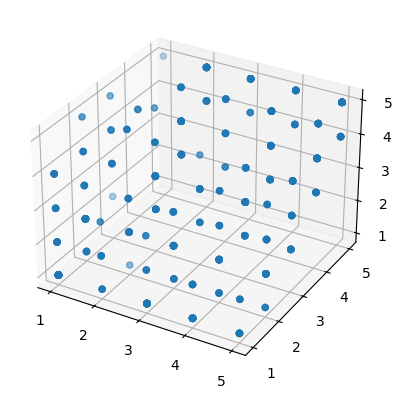

In [82]:
ax = plt.axes(projection='3d')
ax.scatter3D(rfm_train_another["R"], rfm_train_another["F"], 
             rfm_train_another["M"])

In [83]:
rfm_train_another['R'] = rfm_train_another['R'].astype(int)
rfm_train_another['F'] = rfm_train_another['F'].astype(int)
rfm_train_another['M'] = rfm_train_another['M'].astype(int)

In [84]:
rfm_train_another["RFM_score"] = rfm_train_another[['R', 'F', 'M']].sum(axis = 1)
rfm_train_another["RFM_class"] = pd.qcut(rfm_train_another['RFM_score'], 5, ['family','silver', 'gold', 'platinum', 'diamond'])

In [85]:
rfm_train_another.groupby('RFM_class')['RFM_score'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
family,148.0,4.594595,1.199988,3.0,3.0,5.0,6.0,6.0
silver,90.0,7.444444,0.499688,7.0,7.0,7.0,8.0,8.0
gold,98.0,9.469388,0.501628,9.0,9.0,9.0,10.0,10.0
platinum,98.0,11.561224,0.498789,11.0,11.0,12.0,12.0,12.0
diamond,95.0,13.747368,0.811728,13.0,13.0,14.0,14.0,15.0


In [86]:
rfm_train_another.sort_values('Monetary', ascending = False)

,Custkey,Recency,Frequency,Monetary,Recency_pt_mm,Frequency_pt_mm,Monetary_pt_mm,Cluster,R,F,M,RFM_score,RFM_class
343,10021485,0.011236,244,10949474.37,0.371511,0.697944,1.000000,1,2,5,5,12,platinum
432,10025024,0.111111,57,7951267.71,0.786250,0.515108,0.966394,0,4,4,5,13,diamond
443,10025052,0.008929,13,5419724.38,0.322888,0.327946,0.926499,1,2,2,5,9,gold
440,10025039,0.250000,173,3259962.46,0.906526,0.654821,0.874192,0,5,5,5,15,diamond
489,10025919,0.014493,2757,3250786.04,0.423729,1.000000,0.873904,1,3,5,5,13,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,10026009,0.003597,1,224.55,0.116123,0.000000,0.005923,2,1,1,1,3,family
272,10019812,0.002288,1,221.04,0.004055,0.000000,0.004665,2,1,1,1,3,family
427,10024924,0.002268,1,216.33,0.001731,0.000000,0.002945,2,1,1,1,3,family
169,10013039,0.062500,1,216.20,0.693119,0.000000,0.002897,3,4,1,1,6,family


In [87]:
rfm_train_another.sort_values('Monetary', ascending = False)[:107]['RFM_class'].value_counts()

RFM_class
diamond     68
platinum    33
gold         5
silver       1
family       0
Name: count, dtype: int64

In [88]:
# 내가 생각했던 역삼각형이 나온 것 같긴한데.. 이렇게 하는게 맞나?

In [89]:
sum(rfm_train_another['Monetary'][rfm_train_another['RFM_class'] == 'diamond']) / sum(rfm_train_another['Monetary'])

0.5435550485789865

In [90]:
sum(rfm_train_another['Monetary'][rfm_train_another['RFM_class'] == 'platinum']) / sum(rfm_train_another['Monetary'])

0.31272351097487394

In [91]:
sum(rfm_train_another['Monetary'][rfm_train_another['RFM_class'] == 'gold']) / sum(rfm_train_another['Monetary'])

0.10723914070101806

In [92]:
sum(rfm_train_another['Monetary'][rfm_train_another['RFM_class'] == 'silver']) / sum(rfm_train_another['Monetary'])

0.024449564201884398

In [93]:
sum(rfm_train_another['Monetary'][rfm_train_another['RFM_class'] == 'family']) / sum(rfm_train_another['Monetary'])

0.012032735543237088

<Axes: xlabel='Cluster', ylabel='RFM_score'>

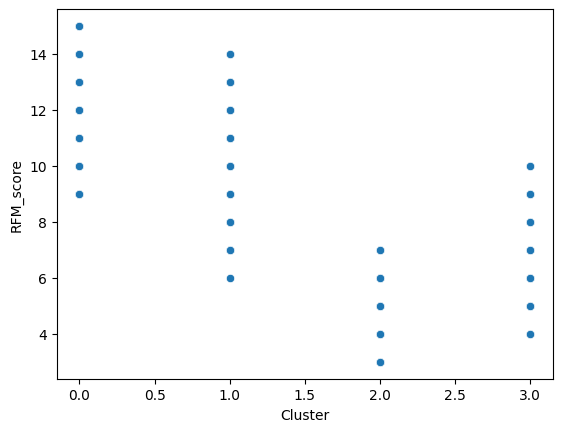

In [94]:
sns.scatterplot(x = 'Cluster', y = 'RFM_score', data = rfm_train_another)

In [95]:
# 뭔가 공산주의 계급인데..? 희소성을 중요하게 여기는 vvip들도 있지 않을까?
rfm_train_another['RFM_class'].value_counts()

RFM_class
family      148
gold         98
platinum     98
diamond      95
silver       90
Name: count, dtype: int64

In [97]:
rfm_train_another.to_csv('rfm_qcut.csv')

In [98]:
rfm_train_another.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Custkey          529 non-null    int64   
 1   Recency          529 non-null    float64 
 2   Frequency        529 non-null    int64   
 3   Monetary         529 non-null    float64 
 4   Recency_pt_mm    529 non-null    float64 
 5   Frequency_pt_mm  529 non-null    float64 
 6   Monetary_pt_mm   529 non-null    float64 
 7   Cluster          529 non-null    int32   
 8   R                529 non-null    int64   
 9   F                529 non-null    int64   
 10  M                529 non-null    int64   
 11  RFM_score        529 non-null    int64   
 12  RFM_class        529 non-null    category
dtypes: category(1), float64(5), int32(1), int64(6)
memory usage: 48.4 KB
